# Лабораторная работа №1

# Устройство изображения. Работа с изображения в Python

## Никитина Наталья, гр. РИМ-181226

In [47]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from skimage.transform import resize
from numpy import roll, dstack, clip
from matplotlib import pyplot as plt

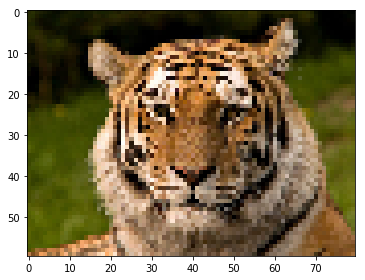

In [48]:
img=imread('tiger-color.png')

h=img.shape[0]
w=img.shape[1]

img=resize(img, (h//10, w//10)) #изменение размера изображения

imshow(img)

## Изменение цвета пикселя изображения

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


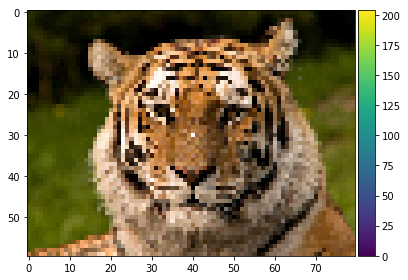

In [49]:
h=img.shape[0]
w=img.shape[1]

img[h//2,w//2]=[102,204,102] #изменение цвета центрального пикселя

imshow(img)

## Изменение цвета прямоугольника

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


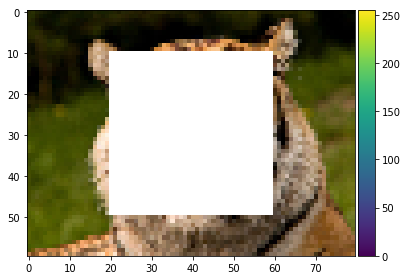

In [50]:
img[h//2-20:h//2+20,w//2-20:w//2+20]=[255,192,203] #изменение цвета прямоугольника

imshow(img)

## Определение рамки изображения

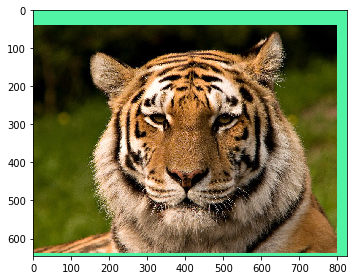

In [51]:
img_border=imread('tiger-border.png')
imshow(img_border)

In [52]:
h=img_border.shape[0]
w=img_border.shape[1]

xs=w//2 #координаты центрального пикселя
ys=h//2

color=img_border[0,0] #определение цвета рамки

left, up, right, down = 0, 0, 0, 0 #инициализация переменных, отвечающих за толщину рамки с разных сторон

for i in range(w): #определение толщины рамки по цвету с разных сторон
    if all(img_border[xs,i]==color):
        left+=1
    else:
        break

for i in range(h):
    if all(img_border[i,ys]==color):
        up+=1
    else:
        break

for i in range(w):
    if all(img_border[xs,w-i-1]==color):
        right+=1
    else:
        break 

for i in range(h):
    if all(img_border[h-i-1,ys]==color):
        down+=1
    else:
        break
        
print("Толщина рамки (слева, сверху, справа, снизу:", left,up,right,down)

Толщина рамки (слева, сверху, справа, снизу: 1 39 25 7


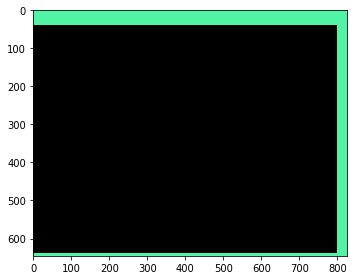

In [53]:
img_border[up:h-down,left:w-right]=[0,0,0] #визуализация рамки посредством закрашивания остальных пикселей
imshow(img_border)

## Вычисление негатива изображения

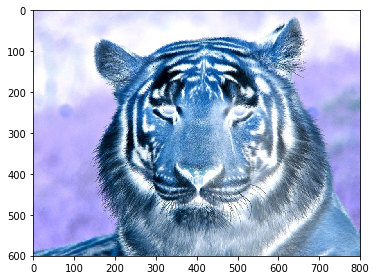

In [54]:
img_chan=imread('tiger-color.png')

r=img_chan[:,:,0] #выделение каналов
g=img_chan[:,:,1]
b=img_chan[:,:,2]

rn=255-r
gn=255-g
bn=255-b

img_neg = dstack((rn,gn, bn))
imshow(img_neg)

### Сравнение результатов

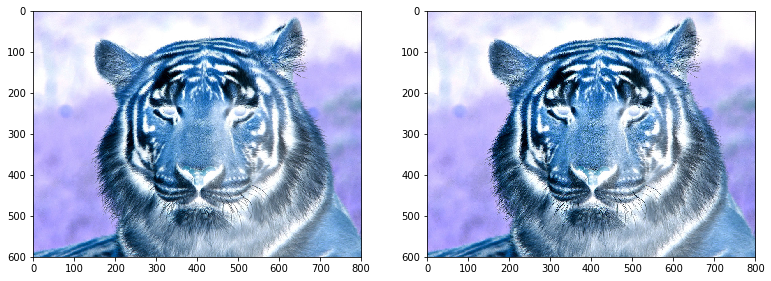

In [56]:
img_et = imread('https://stepik.org/media/attachments/lesson/58181/tiger-negative.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.imshow(img_neg)
plt.subplot(2,3,2)
plt.imshow(img_et)

## Изменение порядка каналов в изображении

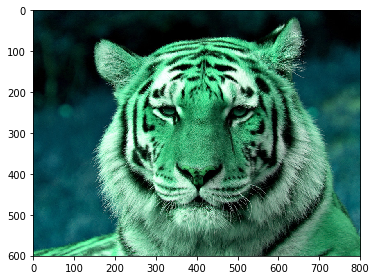

In [57]:
img_brg = dstack((b,r,g))
imshow(img_brg) #визуализация изображения с переставленными каналами

### Сравнение результатов

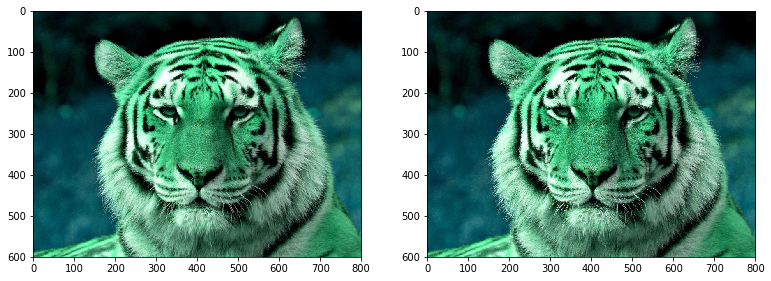

In [58]:
img_et = imread('https://stepik.org/media/attachments/lesson/58181/tiger-brg.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.imshow(img_brg)
plt.subplot(2,3,2)
plt.imshow(img_et)

## Подсчет яркости изображения

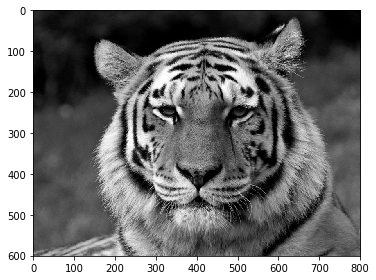

In [59]:
img_f=img_as_float(img_chan)

r=img_f[:,:,0]
g=img_f[:,:,1]
b=img_f[:,:,2]

img_bright=clip(0.2126*r+0.7152*g+0.0722*b,0,1) #подсчет яркости
img_bright_int=img_as_ubyte(img_bright)

imshow(img_bright)

### Сравнение результатов

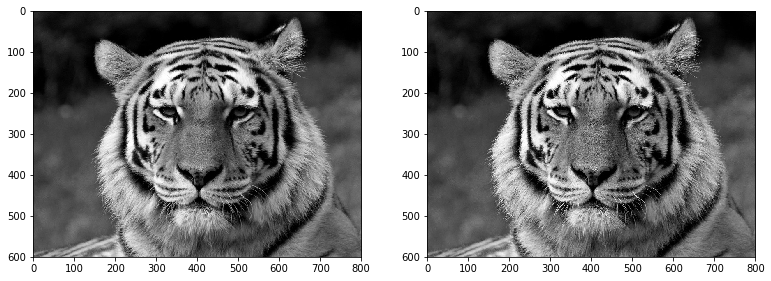

In [60]:
img_et = imread('https://stepik.org/media/attachments/lesson/58181/tiger-y.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.imshow(img_bright)
plt.subplot(2,3,2)
plt.imshow(img_et)

## Сопоставление фотографий Прокудина-Горского

In [61]:
def align(img, g_coord=(0,0)):
    
    row_g, col_g = g_coord
    
    #считываем и преобразуем изображение
    img = imread(img)
    
    img_f = img_as_float(img)
    
    rows=int(img_f.shape[0]//3) #делим на три равные части по высоте, обрезаем края
    cols=img_f.shape[1]
    cut=int(0.05*cols)

    b = img_f[cut:rows-cut,cut:cols-cut]
    g = img_f[rows+cut:2*rows-cut,cut:cols-cut]
    r = img_f[2*rows+cut:3*rows-cut,cut:cols-cut]

    #считаем сдвиги каналов
    b_corr = 0
    shift_b0, shift_b1 = 0, 0

    for i in range(-15,15): #сдвигаем синий канал, накладываем на зеленый, считаем похожесть
        bi = roll(b,i,0)
        for j in range(-15,15):
            bij = roll(bi,j,1)
            b_ij_corr = (bij*g).sum()
            if b_ij_corr > b_corr:
                b_corr = b_ij_corr
                shift_b0, shift_b1 = i, j

    r_corr = 0
    shift_r0, shift_r1 = 0, 0            

    for i in range(-15,15): #сдвигаем синий канал, накладываем на зеленый, считаем похожесть
        ri = roll(r,i,0)
        for j in range(-15,15):
            rij = roll(ri,j,1)
            r_ij_corr = (rij*g).sum()
            if r_ij_corr > r_corr:
                r_corr = r_ij_corr
                shift_r0, shift_r1 = i, j
                
    b_shift = roll(roll(b, shift_b0, 0), shift_b1, 1)
    r_shift = roll(roll(r, shift_r0, 0), shift_r1, 1)

    img_combined = dstack((r_shift, g, b_shift)) #совмещаем три канала с наилучшими сдвигами

    imshow(img_combined)
    
    #сдвигаем точку на зеленом канале
    #на другие каналы
    
    if g_coord!=(0,0):
        row_b = row_g-shift_b0-img_f.shape[0]//3
        col_b = col_g-shift_b1

        row_r = row_g-shift_r0+img_f.shape[0]//3
        col_r = col_g-shift_r1

        return (row_b, col_b), (row_r, col_r)

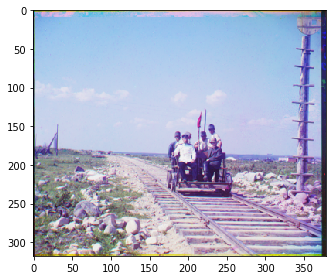

In [62]:
result00=align('00.png',(508,237))

In [63]:
print("Координаты точек на синем и красном каналах:", result00)

Координаты точек на синем и красном каналах: ((153, 236), (857, 238))


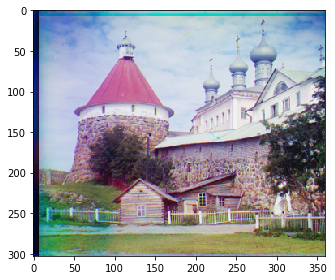

In [64]:
align('01.png')

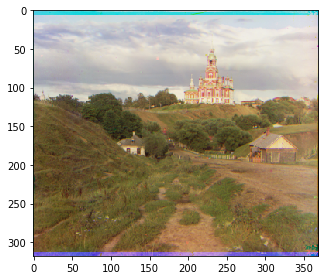

In [65]:
align('02.png')

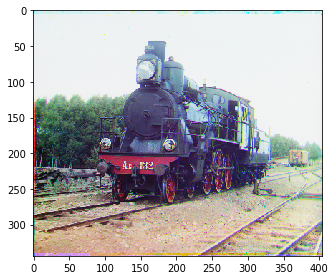

In [66]:
align('03.png')

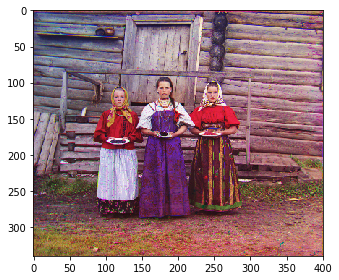

In [67]:
align('04.png')

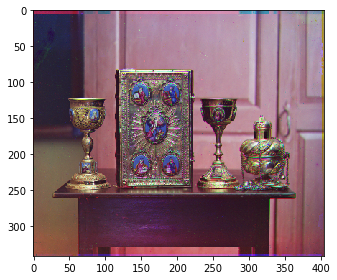

In [68]:
align('05.png')

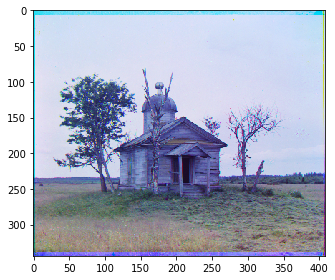

In [69]:
align('06.png')

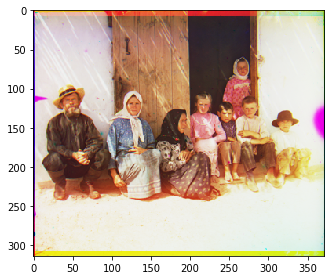

In [70]:
align('07.png')

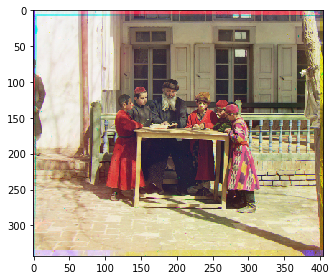

In [71]:
align('08.png')

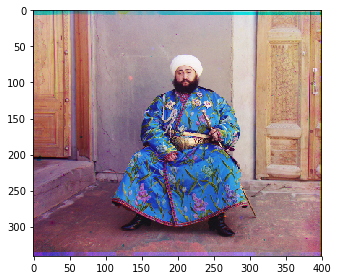

In [72]:
align('09.png')